In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In this notebook I worked to create a scatter plot that would include a line of regression on the quantity of articles written by the NYT about the State Senate. I also tried using a line graph, seen at the bottom, but left this out of my final presentation as it was not as clear for the audience as the scatter/regression was

In [2]:
def combo_yrmonth(row):
    row['year_month'] =row['month'].astype('str') + ' / ' + row['year'].astype('str')
    return row

def combo_yrmonth_nyt(row):
    row['year_month'] =str(row['month']) + ' / ' + str(row['year'])
    return row

In [3]:
nyt = pd.read_pickle("nyt_master")
nyt = nyt.apply(combo_yrmonth_nyt,axis=1)
nyt = nyt [['pub_date','headline_clean','new_desk','year','month','snippet','topic_max','topic_desc','year_month']]
nyt.topic_desc.value_counts()

ethics commission, ethics         190
NYC Schools                       112
budget, taxes                      88
Infighting - Espada/Monserrate     76
NY US Senators                     67
Governor Cuomo, Governorship       65
same-sex marriage                  57
Dean Skelos corruption case        49
MTA, Transit                       34
misc                               30
Senator Bruno corruption case      20
misc, death announcements          18
minimum wage                       16
NYC General                        11
Financial Regulations              11
NYC Leaders vs. Albany              7
immigration                         7
misc social media advertising       6
Name: topic_desc, dtype: int64

In [4]:
nyt[(nyt['year']==2011)&(nyt['month']==6)].sort_values(by='pub_date')

,pub_date,headline_clean,new_desk,year,month,snippet,topic_max,topic_desc,year_month
219,2011-06-08T00:00:00Z,"As Ethics Measure Emerges, So Do Questions Abo...",Metro,2011,6,The actual language of legislation to improve ...,16,"ethics commission, ethics",6 / 2011
543,2011-06-13T00:35:45+0000,"On Gay Marriage, State Senate’s Undecided Eigh...",Metro,2011,6,The still-wavering lawmakers who will decide t...,3,same-sex marriage,6 / 2011
225,2011-06-13T08:33:43Z,"In Reversal, 3 Democratic Senators Will Back G...",NaN,2011,6,Same-sex marriage measure gains momentum in Al...,3,same-sex marriage,6 / 2011
798,2011-06-14T00:00:00Z,They Need to Stand Up for Equality,Editorial,2011,6,There is less than a week left for the New Yor...,3,same-sex marriage,6 / 2011
796,2011-06-16T00:00:00Z,Nice Work if You Can Get It,Editorial,2011,6,The New York State Legislature plans to start ...,16,"ethics commission, ethics",6 / 2011
220,2011-06-16T00:00:00Z,Cuomo Gives Lawmakers Ultimatum on Rent Laws,Metro,2011,6,"The governor said lawmakers, deadlocked on whe...",17,"Governor Cuomo, Governorship",6 / 2011
222,2011-06-16T15:00:24Z,Cuomo Annoyed at Senate for Letting Rent Rules...,NaN,2011,6,Mr. Cuomo chastized lawmakers for failing to a...,17,"Governor Cuomo, Governorship",6 / 2011
33,2011-06-17T00:25:03+0000,Republicans Urge Cuomo to Alter Same-Sex Marri...,Metro,2011,6,With 31 of 62 members of the New York State Se...,3,same-sex marriage,6 / 2011
561,2011-06-17T13:48:03Z,The Caucus | Politics and Social Media,U.S. / Politics,2011,6,"June 17, 2011 - Megan Liberman and Ashley Park...",2,immigration,6 / 2011
260,2011-06-17T14:46:19Z,Video: What to Learn From Weiner’s T.M.I. Moment,NaN,2011,6,Video: Ashley Parker on the future of social m...,8,NY US Senators,6 / 2011


In [5]:
ethics_infighting1 = nyt[(nyt['topic_desc']=='ethics commission, ethics')|(nyt['topic_desc']=='Infighting - Espada/Monserrate')]
ethics_infighting = ethics_infighting1.groupby(by=['year','month'])['headline_clean'].count().reset_index()
ethics_infighting=ethics_infighting.apply(combo_yrmonth,axis=1)
ethics_infighting1.sort_values(by=['year','month'])
ethics_infighting1[(ethics_infighting1['year']==2011)&(ethics_infighting1['month']==6)]

,pub_date,headline_clean,new_desk,year,month,snippet,topic_max,topic_desc,year_month
219,2011-06-08T00:00:00Z,"As Ethics Measure Emerges, So Do Questions Abo...",Metro,2011,6,The actual language of legislation to improve ...,16,"ethics commission, ethics",6 / 2011
796,2011-06-16T00:00:00Z,Nice Work if You Can Get It,Editorial,2011,6,The New York State Legislature plans to start ...,16,"ethics commission, ethics",6 / 2011
800,2011-06-24T01:11:01+0000,"With No Decision on Same-Sex Marriage, Lawmake...",Metro,2011,6,The New York State Legislature abruptly adjour...,16,"ethics commission, ethics",6 / 2011


In [60]:
import datetime as dt 
def year_mt(row):
#     print(row)
#     print(f"Type: {type(row['month'])}")
    mt = row['month']
    if mt == 11:
        row['axes_yr'] = row['year']
    else:
        row['axes_yr'] = ''
    return row

def combo_yrmonth(row):
    row['year_month'] =row['month'].astype('str') + ' / ' + row['year'].astype('str')
    return row

def combo_yrmonth_datetime(row):
    row['month_year_dt'] = dt.date(year=row['year'],month=row['month'],day=1)
    row['dt_counter'] = row.name + 1
    return row

In [61]:
nyt_total = nyt.groupby(by=['year','month'])['headline_clean'].count().reset_index()
nyt_total = nyt_total.apply(combo_yrmonth,axis=1)
nyt_total = nyt_total.apply(combo_yrmonth_datetime,axis=1)
nyt_total = nyt_total.apply(year_mt,axis=1)

In [62]:
nyt_total

,year,month,headline_clean,year_month,month_year_dt,dt_counter,axes_yr
0,2009,1,14,1 / 2009,2009-01-01,1,
1,2009,2,9,2 / 2009,2009-02-01,2,
2,2009,3,12,3 / 2009,2009-03-01,3,
3,2009,4,8,4 / 2009,2009-04-01,4,
4,2009,5,13,5 / 2009,2009-05-01,5,
5,2009,6,31,6 / 2009,2009-06-01,6,
6,2009,7,18,7 / 2009,2009-07-01,7,
7,2009,8,5,8 / 2009,2009-08-01,8,
8,2009,9,7,9 / 2009,2009-09-01,9,
9,2009,10,5,10 / 2009,2009-10-01,10,


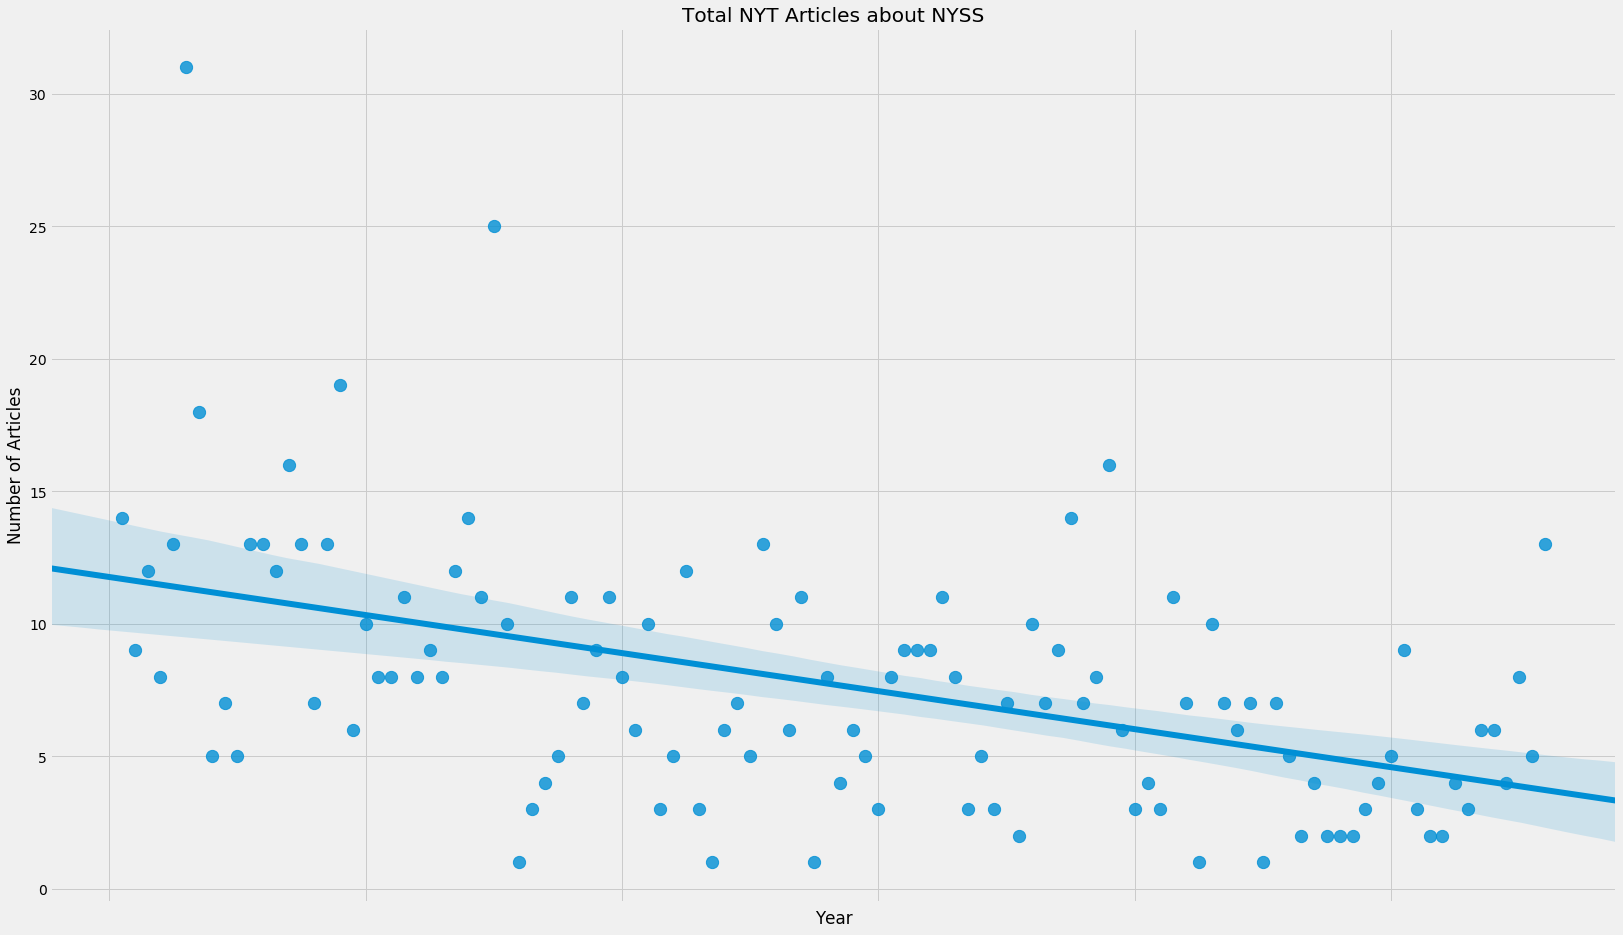

In [63]:
fig, ax = plt.subplots(figsize=(25,15))
plt.style.use('fivethirtyeight')
# sns.pointplot(x='year_month',y='headline_clean',data=nyt_total,ax=ax)
# sns.lmplot(x='year_month',y='headline_clean',data=nyt_total,ax=ax)
sns.regplot(x='dt_counter',y='headline_clean',data=nyt_total,ax=ax,scatter_kws={'s':150})
# ax.xaxis_date()
ax.set_xticklabels(labels= nyt_total['axes_yr']\
                   ,fontdict={'fontsize': 24})
ax.set_xlabel("Year")
ax.set_ylabel("Number of Articles")
ax.set_title("Total NYT Articles about NYSS");

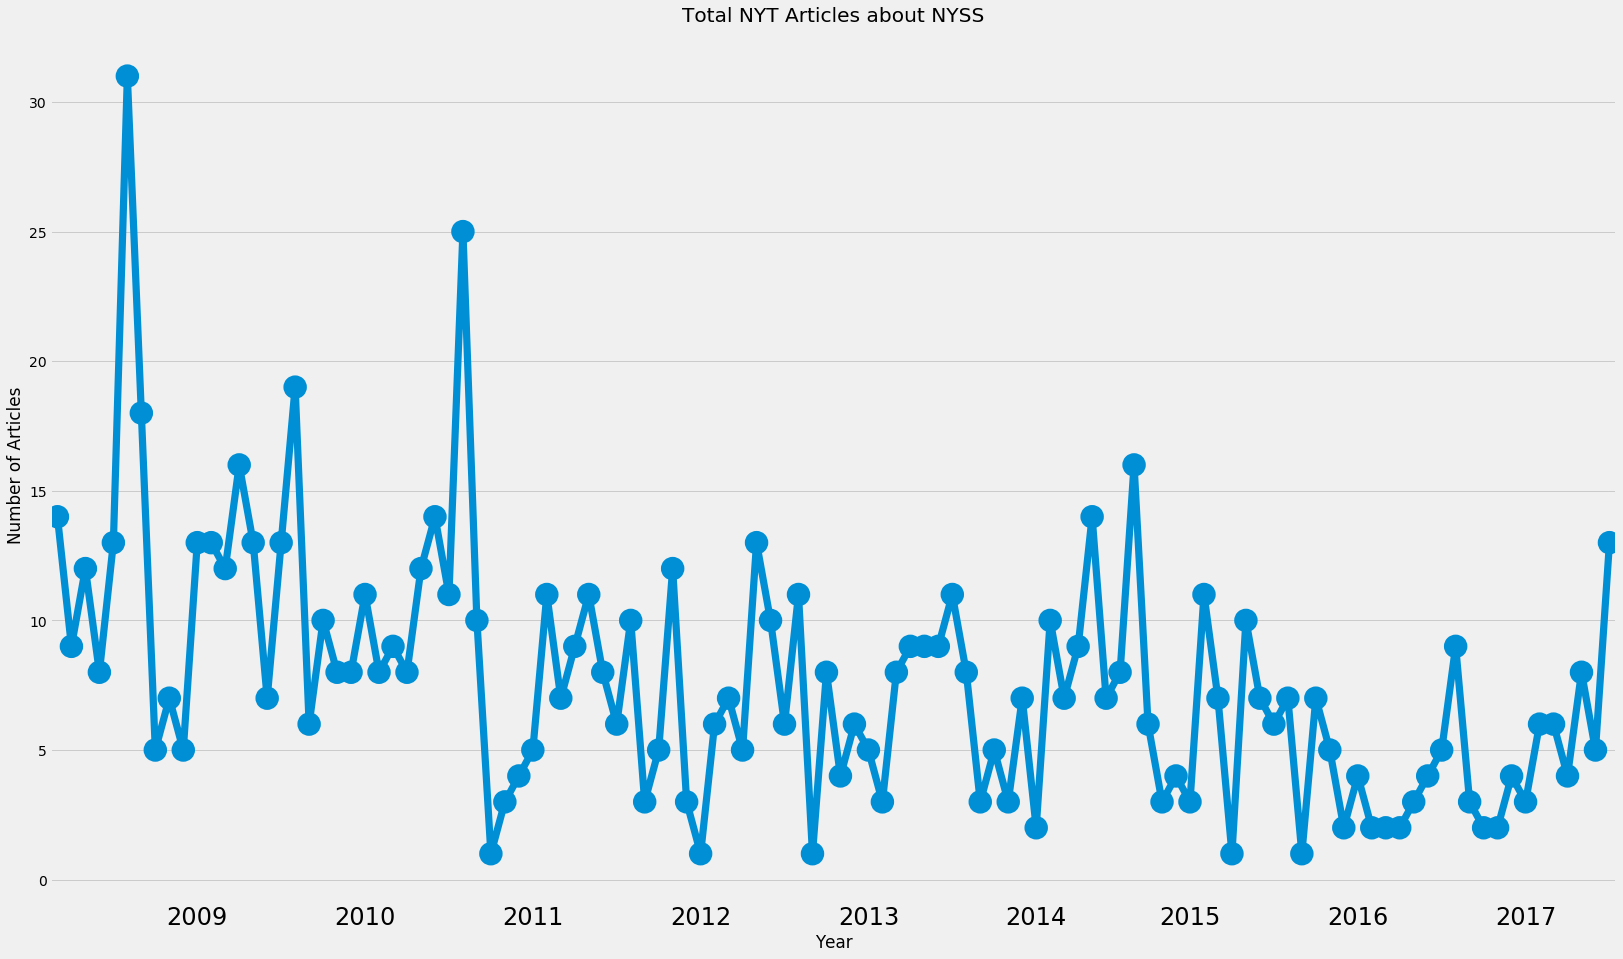

In [64]:
fig, ax = plt.subplots(figsize=(25,15))
plt.style.use('fivethirtyeight')
sns.pointplot(x='year_month',y='headline_clean',data=nyt_total,ax=ax)
# sns.lmplot(x='year_month',y='headline_clean',data=nyt_total,ax=ax)
# sns.regplot(x='dt_counter',y='headline_clean',data=nyt_total,ax=ax,scatter_kws={'s':150})
# ax.xaxis_date()
ax.set_xticklabels(labels= nyt_total['axes_yr']\
                   ,fontdict={'fontsize': 24})
ax.set_xlabel("Year")
ax.set_ylabel("Number of Articles")
ax.set_title("Total NYT Articles about NYSS");